### Importy

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
import seaborn as sns
import matplotlib.pyplot as plt

### Wczytanie pliku z danymi wejściowymi

In [2]:
df = pd.read_csv("kepler.csv")

### Kształt ramki danych

In [3]:
l_obiektow = df.shape[0]
l_atrybutow = df.columns.size

print('Liczba obiektów: {}'.format(l_obiektow))
print('Liczba atrybutów: {}\n'.format(l_atrybutow))

Liczba obiektów: 9564
Liczba atrybutów: 64



In [4]:
l_brakow = df.isnull().sum().sum()

print('Brakująca liczba danych: {}\n'.format(l_brakow))

Brakująca liczba danych: 105463



### Odrzucamy kolumny mówiące o błedach pomiaru

In [5]:
#err_columns = [col for col in df.columns if 'err' in col]
#df = df.drop(err_columns, axis=1)

### Podstawowe wskaźniki statystyczne dla ramki danych

In [6]:
df.describe()

loc_rowid     koi_period  koi_period_err1  koi_period_err2  koi_eccen  koi_eccen_err1  koi_eccen_err2   koi_impact  koi_impact_err1  koi_impact_err2  koi_duration  koi_duration_err1  koi_duration_err2     koi_depth  koi_depth_err1  koi_depth_err2      koi_ror  koi_ror_err1  koi_ror_err2     koi_srho  koi_srho_err1  koi_srho_err2       koi_prad  koi_prad_err1  koi_prad_err2      koi_sma  koi_sma_err1  koi_sma_err2     koi_incl  koi_incl_err1  koi_incl_err2       koi_teq  koi_teq_err1  koi_teq_err2     koi_insol  koi_insol_err1  koi_insol_err2       koi_dor  koi_dor_err1  koi_dor_err2  koi_max_sngle_ev  koi_max_mult_ev  koi_model_snr    koi_count  koi_num_transits  koi_tce_plnt_num     koi_steff  koi_steff_err1  koi_steff_err2    koi_slogg  koi_slogg_err1  koi_slogg_err2     koi_smet  koi_smet_err1  koi_smet_err2     koi_srad  koi_srad_err1  koi_srad_err2    koi_smass  koi_smass_err1  koi_smass_err2
count  9564.000000    9564.000000      9110.000000      9110.000000     9201.0             0.0             0.0  9201.000000      9110.000000      9110.000000   9564.000000        9110.000000        9110.000000  9.201000e+03     9110.000000     9110.000000  9201.000000   9201.000000   9201.000000  9243.000000    9243.000000    9243.000000    9201.000000    9201.000000    9201.000000  9201.000000           0.0           0.0  9200.000000            0.0            0.0   9201.000000           0.0           0.0  9.243000e+03    9.243000e+03    9.243000e+03   9201.000000   9110.000000   9110.000000       8422.000000      8422.000000    9201.000000  9564.000000       8422.000000       9218.000000   9201.000000     9096.000000     9081.000000  9201.000000     9096.000000     9096.000000  9178.000000    9177.000000    9177.000000  9201.000000    9096.000000    9096.000000  9201.000000     9096.000000     9096.000000
mean   4782.500000      75.671358         0.002148        -0.002148        0.0             NaN             NaN     0.735105         1.959861        -0.332557      5.621606           0.339942          -0.339942  2.379134e+04      123.197563     -123.197563     0.283646      1.781782     -0.100652     9.164414      18.064681      -5.488532     102.891778      17.657684     -33.023314     0.223989           NaN           NaN    82.469147            NaN            NaN   1085.385828           NaN           NaN  7.745737e+03    3.750698e+03   -4.043522e+03     76.736333     23.678551    -23.678551        176.846052      1025.664672     259.895001     1.406315        385.006768          1.243654   5706.823280      144.635554     -162.265059     4.310157        0.120738       -0.143161    -0.124431       0.228716      -0.252033     1.728712       0.362292      -0.394806     1.023706        0.122801       -0.138824
std    2761.033321    1334.744046         0.008236         0.008236        0.0             NaN             NaN     3.348832         9.421653         1.249828      6.471554           0.669823           0.669823  8.224268e+04     4112.615230     4112.615230     3.306558      9.406659      1.241324    53.807967      76.800771      32.336701    3077.639126     391.138501    1193.519910     0.566359           NaN           NaN    15.223627            NaN            NaN    856.351161           NaN           NaN  1.592047e+05    5.504421e+04    8.838831e+04    845.274598    298.214570    298.214570        770.902357      4154.121620     795.806615     0.873289        545.756200          0.664573    796.857947       47.052305       72.746348     0.432606        0.132837        0.085477     0.282111       0.077141       0.085453     6.127185       0.930870       2.168213     0.349447        0.085946        0.178983
min       1.000000       0.241843         0.000000        -0.172500        0.0             NaN             NaN     0.000000         0.000000       -59.320000      0.052000           0.000000         -20.200000  0.000000e+00        0.000000  -388600.000000     0.001289      0.000000    -59.325720     0.000040       0.000000    -

### Opis kolumn

Kepler Name : Nazwa planety (składa się z nazwy gwiazdy i litery (a, b, c itd.) danej planety

Exoplanet Archive Disposition : CONFIRMED - planeta; pozostałe statusy oznaczają, że to nie planeta

Orbital Period [days]  : ilość dni potrzebnych do pełnego obiegu planety wokół gwiazdy

Eccentricity : Kształt orbity <0;1> gdzie 0 to okrąg, a  1 to parabola (pomiędzy elipsa)

Impact Parameter : Odległość między środkami planety i gwiazdy w koniunkcji

Transit Duration [hrs] : Czas tranzytu (przesłaniania gwiazdy przez planetę)

Transit Depth [ppm] : Jaki ułamek strumienia promieniowania straciła gwiazda w trakcie tranzytu (jej przesłonięcia) planety

ppm - parts per milion

Planet-Star Radius Ratio : Promień planety podzielony przez promień gwiazdy

Fitted Stellar Density [g/cm3] : Dopasowana gęstość gwiazdy

Planetary Fit Type : LS, MCMC, DV, none albo LS+MCMC - sposób dopasowywania danych, których nie można wyznaczyć jednoznacznie precyzyjnie

Planetary Radius [Earth radii] : Promień planety (ile to jest promieni Ziemii)

Orbit Semi-Major Axis [AU] : Połowa dłuższego (w przypadku orbit okręgów bez znaczenia, który to) promienia orbity planety (w jednostkach astronomicznych)

Inclination [deg] : Inklinacja (nachylenie) płaszczyzny orbity do płaszczyzny odniesienia (oś obrotu planety)

Equilibrium Temperature [K] : Przyblizona temperatura planety w K

Insolation Flux [Earth Flux] : strumień nasłonecznienia w porównaniu do ziemskiego (inny sposób wyznaczenia temperatury)

Planet-Star Distance over Star Radius : Dystans planety do gwiazdy liczony w promieniach gwiazdy

Maximum Single Event Statistic : Dotyczy wyliczeń strumienia promieniowania dla tranzytów (sposób wykrywania planet)

Maximum Multiple Event Statistic : To co wyżej, ale przy znajdowaniu układów z wieloma planetami

Transit Signal-to-Noise : Transit depth znormalizowany

Number of Planets : Liczba obiektów w układzie, które były sklasyfikowane jako kandydaci do miana planet

Number of Transits : Licba spodziewanych tranzytów

TCE Planet Number : Numer katalogowy pozytywnie sklasyfikowanej planety (nie kandydata) w danym układzie

In [7]:
column_map = {
    "kepler_name" : "Kepler Name",
    "koi_disposition" : "Exoplanet Archive Disposition",
    "koi_period" : "Orbital Period",
    "koi_eccen" : "Eccentricity",
    "koi_impact" : "Impact Parameter",
    "koi_duration" : "Transit Duration",
    "koi_depth" : "Transit Depth",
    "koi_ror" : "Planet-Star Radius Ratio",
    "koi_srho" : "Fitted Stellar Density",
    "koi_fittype" : "Planetary Fit Type",
    "koi_prad" : "Planetary Radius",
    "koi_sma" : "Orbit Semi-Major Axis",
    "koi_incl" : "Inclination",
    "koi_teq" : "Equilibrium Temperature",
    "koi_insol" : "Insolation Flux",
    "koi_dor" : "Planet-Star Distance over Star Radius",
    "koi_max_sngle_ev" : "Maximum Single Event Statistic",
    "koi_max_mult_ev" : "Maximum Multiple Event Statistic",
    "koi_model_snr" : "Transit Signal-to-Noise",
    "koi_count" : "Number of Planets",
    "koi_num_transits" : "Number of Transits",
    "koi_tce_plnt_num" : "TCE Planet Number",
    "koi_steff" : "Stellar Effective Temperature",
    "koi_slogg" : "Stellar Surface Graivty",
    "koi_smet" : "Stellar Metalicity",
    "koi_srad" : "Stellar Radius",
    "koi_smass" : "Stellar Mass"
}
df = df.rename(columns=column_map)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9564 entries, 0 to 9563
Data columns (total 64 columns):
loc_rowid                                9564 non-null int64
Kepler Name                              2305 non-null object
Exoplanet Archive Disposition            9564 non-null object
Orbital Period                           9564 non-null float64
koi_period_err1                          9110 non-null float64
koi_period_err2                          9110 non-null float64
Eccentricity                             9201 non-null float64
koi_eccen_err1                           0 non-null float64
koi_eccen_err2                           0 non-null float64
Impact Parameter                         9201 non-null float64
koi_impact_err1                          9110 non-null float64
koi_impact_err2                          9110 non-null float64
Transit Duration                         9564 non-null float64
koi_duration_err1                        9110 non-null float64
koi_duration_err2    

Mapa skorelowania poszczególnych atrybutów

In [9]:
corr = df.corr()
plt.figure(figsize=(64, 64), dpi = 300)
sns.heatmap(df.corr(), annot = df.corr())

### Badamy najsilniej skorelowane atrybuty

In [26]:
# nie interesuje nas znak
corr_array = corr.abs().values
# wyrzucamy NaNy
corr_array  = corr_array[~np.isnan(corr_array)]
#sortujemy 
corr_sorted = np.sort(corr_array[::-1], axis=0)
# wyrzucamy wartoci z przekątnej 
corr_sorted = corr_sorted[np.where( corr_sorted != 1.0 )]
# Maksymalny wskaźnik skorelowania pomiędzy danymi
np.amax(corr_sorted)

0.9998041283072305

### Pokazujemy jak rozkładają się wartości skorelowania danych

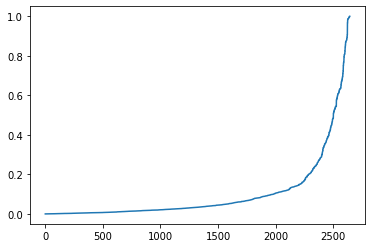

In [27]:
plt.plot(corr_sorted)
plt.show()

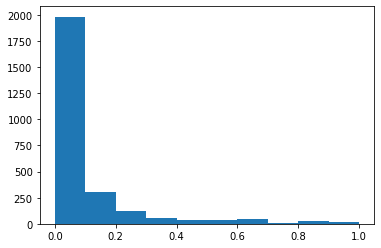

In [28]:
plt.hist(corr_sorted)
plt.show()

In [ ]:
#TODO 
Mamy kilka atrybutów silnie skorelowanych. Warto by je znaleźc i o tym napisać